( X1 , X2 ) = ( 20.0 , 0.0 )
f1 = 20.0
f2 = 60.0
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 8.0
f2 = 184.0


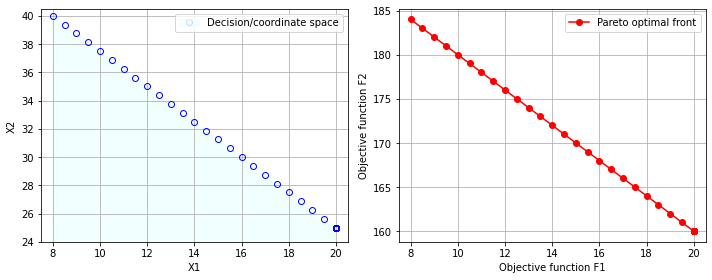

In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt

# max 			f1 = X1
# max 			f2 = 3 X1 + 4 X2
# constraints	X1 <= 20
#     			X2 <= 40
# 				5 X1 + 4 X2 <= 200

model = ConcreteModel()

model.X1 = Var(within=NonNegativeReals)
model.X2 = Var(within=NonNegativeReals)

model.C1 = Constraint(expr = model.X1 <= 20)
model.C2 = Constraint(expr = model.X2 <= 40)
model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

model.f1 = Var()
model.f2 = Var()
model.C_f1 = Constraint(expr = model.f1 == model.X1)
model.C_f2 = Constraint(expr = model.f2 == 3 * model.X1 + 4 * model.X2)
model.O_f1 = Objective(expr = model.f1, sense=maximize)
model.O_f2 = Objective(expr = model.f2, sense=maximize)

# max f1 separately
# install glpk solver:  sudo apt-get install glpk-utils
model.O_f2.deactivate()
solver = SolverFactory('glpk')  #'cplex', 'ipopt'
solver.solve(model)

print('( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
print('f1 = ' + str(value(model.f1)))
print('f2 = ' + str(value(model.f2)))
f2_min = value(model.f2)

# max f2 separately
model.O_f2.activate()
model.O_f1.deactivate()
solver = SolverFactory('glpk')  #'cplex', 'ipopt'
solver.solve(model)

print('( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
print('f1 = ' + str(value(model.f1)))
print('f2 = ' + str(value(model.f2)))
f2_max = value(model.f2)

# apply augmented $\epsilon$-Constraint
# max   		f1 + delta*s
# constraint 	f2 - s = e
model.O_f1.activate()
model.O_f2.deactivate()

model.del_component(model.O_f1)
model.del_component(model.O_f2)

model.e = Param(initialize=0, mutable=True)
model.delta = Param(initialize=0.00001)
model.slack = Var(within=NonNegativeReals)
model.O_f1 = Objective(expr = model.f1 + model.delta * model.slack, sense=maximize)
model.C_e = Constraint(expr = model.f2 - model.slack == model.e)

n = 100
step = int((f2_max - f2_min) / n)
steps = list(range(int(f2_min),int(f2_max),step)) + [f2_max]

x1_l, x2_l = [], []
f1_l, f2_l = [], []
for i in steps:
    model.e = i
    solver.solve(model)
    x1_l.append(value(model.X1))
    x2_l.append(value(model.X2))
    f1_l.append(value(model.f1))
    f2_l.append(value(model.f2))
    # print(i, value(model.X1), value(model.X2), value(model.f1), value(model.slack), value(model.f2))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,4))
edge, = ax1.plot(x1_l,x2_l,'o', markersize=6, markerfacecolor='none', c='b')
shaded = ax1.fill_between(x1_l, x2_l, color='azure', alpha=0.85)
ax1.legend([(edge, shaded)], ['Decision/coordinate space'], loc='best')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_xlim((7.5,20.5))
ax1.set_ylim((24,40.5))
ax1.grid(True)

ax2.plot(f1_l, f2_l, 'o-', c='r', label='Pareto optimal front')
ax2.legend(loc='best')
ax2.set_xlabel('Objective function F1')
ax2.set_ylabel('Objective function F2')
ax2.grid(True)
fig.tight_layout()
plt.show()

( X1 , X2, X3, X4, X5 ) = ( 0.1600001403719965 , 59.99999878855387 , 0.15000000474061706 , 0.4000000245641724 , 0.8000000113268446 )
f1 = 0.42899765993284905
f2 = 16633.02998506264
( X1 , X2, X3, X4, X5 ) = ( 0.28000000999997193 , 60.00000059999592 , 0.14999999000004957 , 0.8000000099998107 , 1.2000000119998315 )
f1 = 0.47099741588662225
f2 = 3542.4009228105897


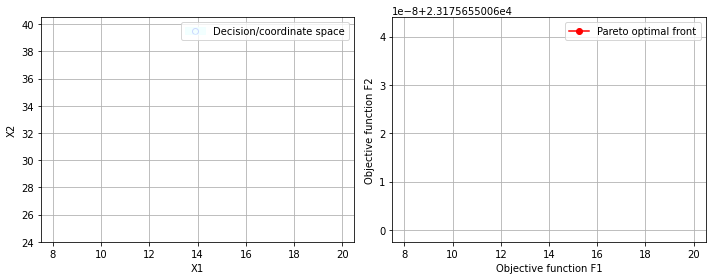

In [7]:
import matplotlib.pyplot as plt

# max 			f1 = X1
# max 			f2 = 3 X1 + 4 X2
# constraints	X1 <= 20
#     			X2 <= 40
# 				5 X1 + 4 X2 <= 200

model = ConcreteModel()

model.X1 = Var(within=NonNegativeReals)
model.X2 = Var(within=NonNegativeReals)
model.X3 = Var(within=NonNegativeReals)
model.X4 = Var(within=NonNegativeReals)
model.X5 = Var(within=NonNegativeReals)

model.C1 = Constraint(expr = model.X1 <= .28)
model.C2 = Constraint(expr = model.X2 <= 60)
model.C3 = Constraint(expr = model.X3 <= .25)
model.C4 = Constraint(expr = model.X4 <= .8)
model.C5 = Constraint(expr = model.X5 <= 1.2)

model.C6 = Constraint(expr = model.X1 >= .16)
model.C7 = Constraint(expr = model.X2 >= 50)
model.C8 = Constraint(expr = model.X3 >= .15)
model.C9 = Constraint(expr = model.X4 >= .4)
model.C10 = Constraint(expr = model.X5 >= .8)

model.f1 = Var()
model.f2 = Var()
model.C_f1 = Constraint(expr = model.f1 == .3748333 + .0041667*model.X1 - .0041667*model.X2 + 0.09*model.X3 + .305*model.X4 + .1925*model.X5 + .0033333*model.X1*model.X2 - .75*model.X1*model.X3 + .1875*model.X1*model.X4 - .1875*model.X1*model.X5 + .009*model.X2*model.X3 - .00225*model.X2*model.X4 + .00225*model.X2*model.X5 + .35*model.X3*model.X4 - .6*model.X3*model.X5 - .225*model.X4*model.X5)
model.C_f2 = Constraint(expr = model.f2 == -95522.2 + 208852.5*model.X1 + 2111.7*model.X2  -213627.2*model.X3 + 39419.8*model.X4 + 80131.6*model.X5 - 5032.1*model.X1*model.X2 + 216391.7*model.X1*model.X3 - 123279.2*model.X1*model.X4 + 58335.4*model.X1*model.X5 + 1705.9*model.X2*model.X3 + 313.4*model.X2*model.X4 - 1519.7*model.X2*model.X5 + 40930.0*model.X3*model.X4 + 57067.5*model.X3*model.X5 - 35898.7*model.X4*model.X5)
model.O_f1 = Objective(expr = model.f1, sense=minimize)
model.O_f2 = Objective(expr = model.f2, sense=minimize)

# max f1 separately
# install glpk solver:  sudo apt-get install glpk-utils
model.O_f2.deactivate()
solver = SolverFactory('ipopt')  #'cplex', 'ipopt'
solver.solve(model)

print('( X1 , X2, X3, X4, X5 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' , ' + str(value(model.X3)) + ' , ' + str(value(model.X4)) + ' , ' + str(value(model.X5)) + ' )')
print('f1 = ' + str(value(model.f1)))
print('f2 = ' + str(value(model.f2)))
f2_min = value(model.f2)

# max f2 separately
model.O_f2.activate()
model.O_f1.deactivate()
solver = SolverFactory('ipopt')  #'cplex', 'ipopt'
solver.solve(model)

print('( X1 , X2, X3, X4, X5 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' , ' + str(value(model.X3)) + ' , ' + str(value(model.X4)) + ' , ' + str(value(model.X5)) + ' )')
print('f1 = ' + str(value(model.f1)))
print('f2 = ' + str(value(model.f2)))
f2_max = value(model.f2)

# apply augmented $\epsilon$-Constraint
# max   		f1 + delta*s
# constraint 	f2 - s = e
model.O_f1.activate()
model.O_f2.deactivate()

model.del_component(model.O_f1)
model.del_component(model.O_f2)

model.e = Param(initialize=0, mutable=True)
model.delta = Param(initialize=0.00001)
model.slack = Var(within=NonNegativeReals)
model.O_f1 = Objective(expr = model.f1 + model.delta * model.slack, sense=maximize)
model.C_e = Constraint(expr = model.f2 - model.slack == model.e)

n = 100
step = int((f2_max - f2_min) / n)
steps = list(range(int(f2_min),int(f2_max),step)) + [f2_max]

x1_l, x2_l, x3_l, x4_l, x5_l = [], [], [], [], []
f1_l, f2_l = [], []
for i in steps:
    model.e = i
    solver.solve(model)
    x1_l.append(value(model.X1))
    x2_l.append(value(model.X2))
    x3_l.append(value(model.X3))
    x4_l.append(value(model.X4))
    x5_l.append(value(model.X5))
    f1_l.append(value(model.f1))
    f2_l.append(value(model.f2))
    # print(i, value(model.X1), value(model.X2), value(model.f1), value(model.slack), value(model.f2))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,4))
edge, = ax1.plot(x1_l,x2_l,'o', markersize=6, markerfacecolor='none', c='b')
shaded = ax1.fill_between(x1_l, x2_l, color='azure', alpha=0.85)
ax1.legend([(edge, shaded)], ['Decision/coordinate space'], loc='best')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_xlim((7.5,20.5))
ax1.set_ylim((24,40.5))
ax1.grid(True)

ax2.plot(f1_l, f2_l, 'o-', c='r', label='Pareto optimal front')
ax2.legend(loc='best')
ax2.set_xlabel('Objective function F1')
ax2.set_ylabel('Objective function F2')
ax2.grid(True)
fig.tight_layout()
plt.show()